In [1]:
import pandas as pd
import numpy as np


| Column Name  | Meaning                                                   |
| ------------ | --------------------------------------------------------- |
| **school**   | The school the student goes to (GP or MS)                 |
| **sex**      | Gender of the student (F = female, M = male)              |
| **age**      | Age of the student                                        |
| **address**  | Type of home (U = urban, R = rural)                       |
| **famsize**  | Size of the family (LE3 = 3 or less, GT3 = more than 3)   |
| **Pstatus**  | Are parents living together? (T = together, A = apart)    |
| **Medu**     | Mother's education (0 to 4 scale, 4 = higher education)   |
| **Fedu**     | Father's education (0 to 4 scale, 4 = higher education)   |
| **Mjob**     | Mother's job (teacher, health, services, at\_home, other) |
| **Fjob**     | Father's job (same as above)                              |
| **famrel**   | Family relationship quality (1 to 5)                      |
| **freetime** | Free time after school (1 to 5)                           |
| **goout**    | How often they go out with friends (1 to 5)               |
| **Dalc**     | Alcohol consumption on weekdays (1 to 5)                  |
| **Walc**     | Alcohol consumption on weekends (1 to 5)                  |
| **health**   | Current health (1 = very bad, 5 = very good)              |
| **absences** | Number of days missed from school                         |
| **G1**       | Grade in the first period (0 to 20)                       |
| **G2**       | Grade in the second period (0 to 20)                      |
| **G3**       | Final grade (0 to 20) â€“ This is usually the target column |


In [3]:
data=pd.read_csv("/content/student_data.csv")

In [4]:
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

**Understand the structure of data**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**Check for Missing Values**

In [6]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

**Get Basic Statistics of Data**

In [7]:
data.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

**Visualize the target variable (G3 â€“ Final Grade)**

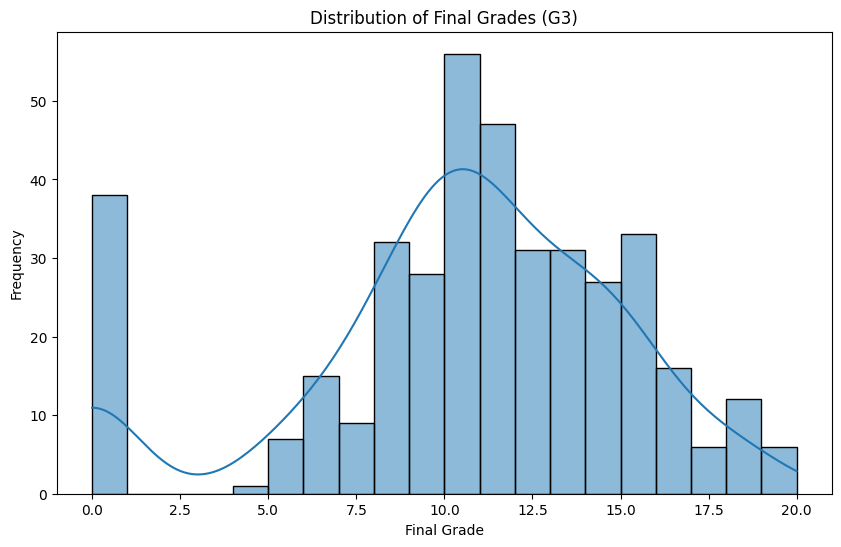

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()


**Check correlation between features and target**

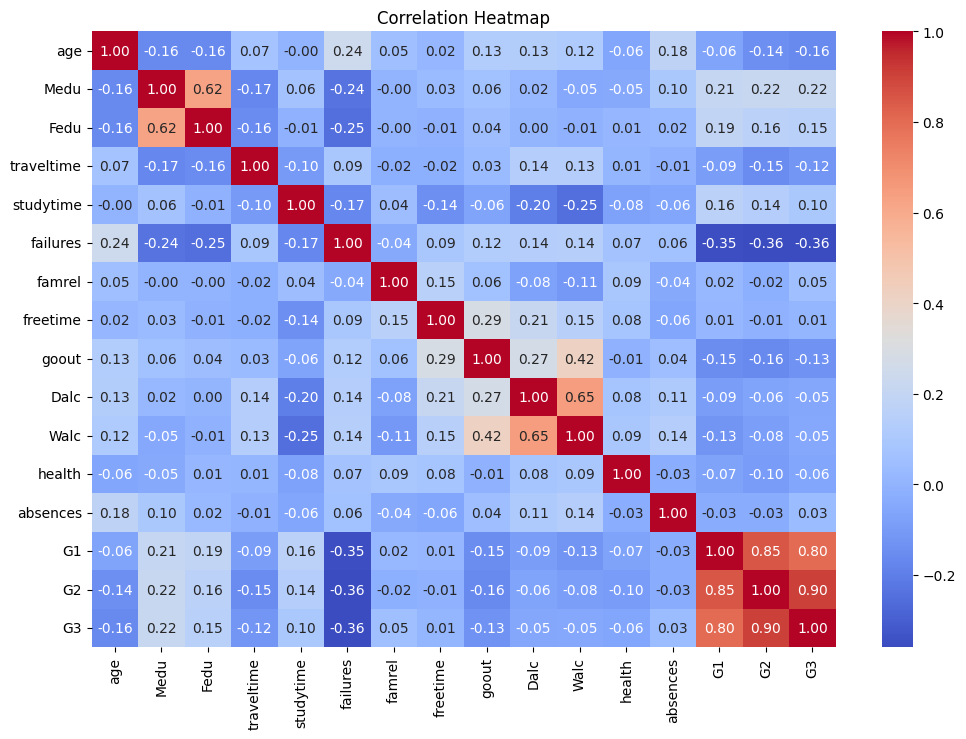

In [10]:
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Create heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Select features and define input (X) and output (y)**

In [13]:
X = data[['G1', 'G2', 'studytime', 'failures', 'absences']]
y = data['G3']


Split data into training and testing

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train a Linear Regression model**

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Make predictions and evaluate**


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 4.466503212015603
R^2 Score: 0.7821754247320556


**EDA Interpretation Summary:**

After conducting exploratory data analysis on the student dataset, we observed several important patterns. The distribution of the final grade (G3) is skewed slightly toward lower scores, suggesting that a majority of students perform moderately or below average. The correlation heatmap revealed that G1 and G2 (first and second period grades) are highly correlated with the final grade G3, which is expected. Variables such as absences and health showed very weak correlation with G3, indicating limited predictive power. Categorical features like parental education and job types vary significantly among students, and some gender-based or school-based performance trends might be explored in further analysis. Overall, the dataset is clean with no major missing values, making it ready for further modeling or predictive analysis.

**Boxplot to detect outliers**

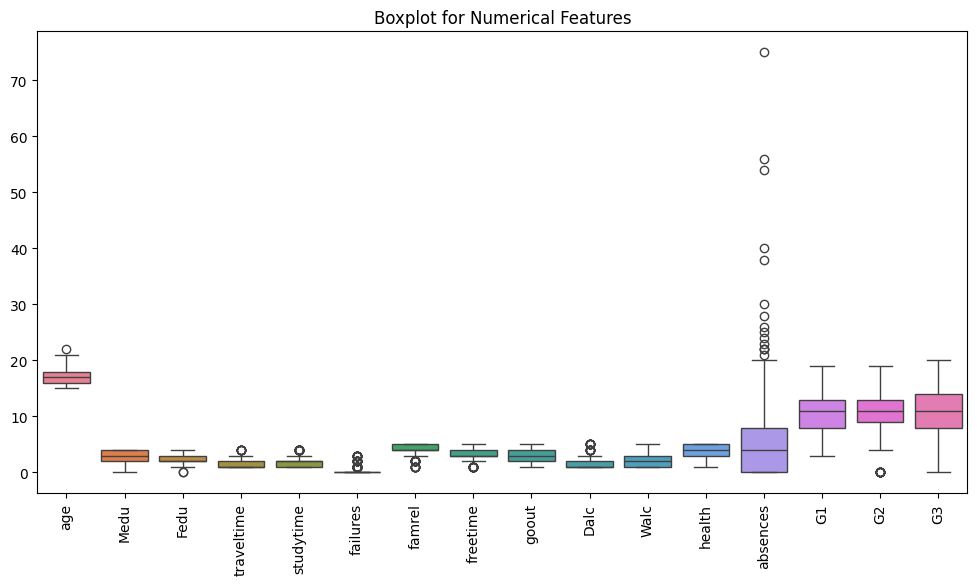

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_data)
plt.title("Boxplot for Numerical Features")
plt.xticks(rotation=90)
plt.show()


 **Pairplot for multiple relationships**

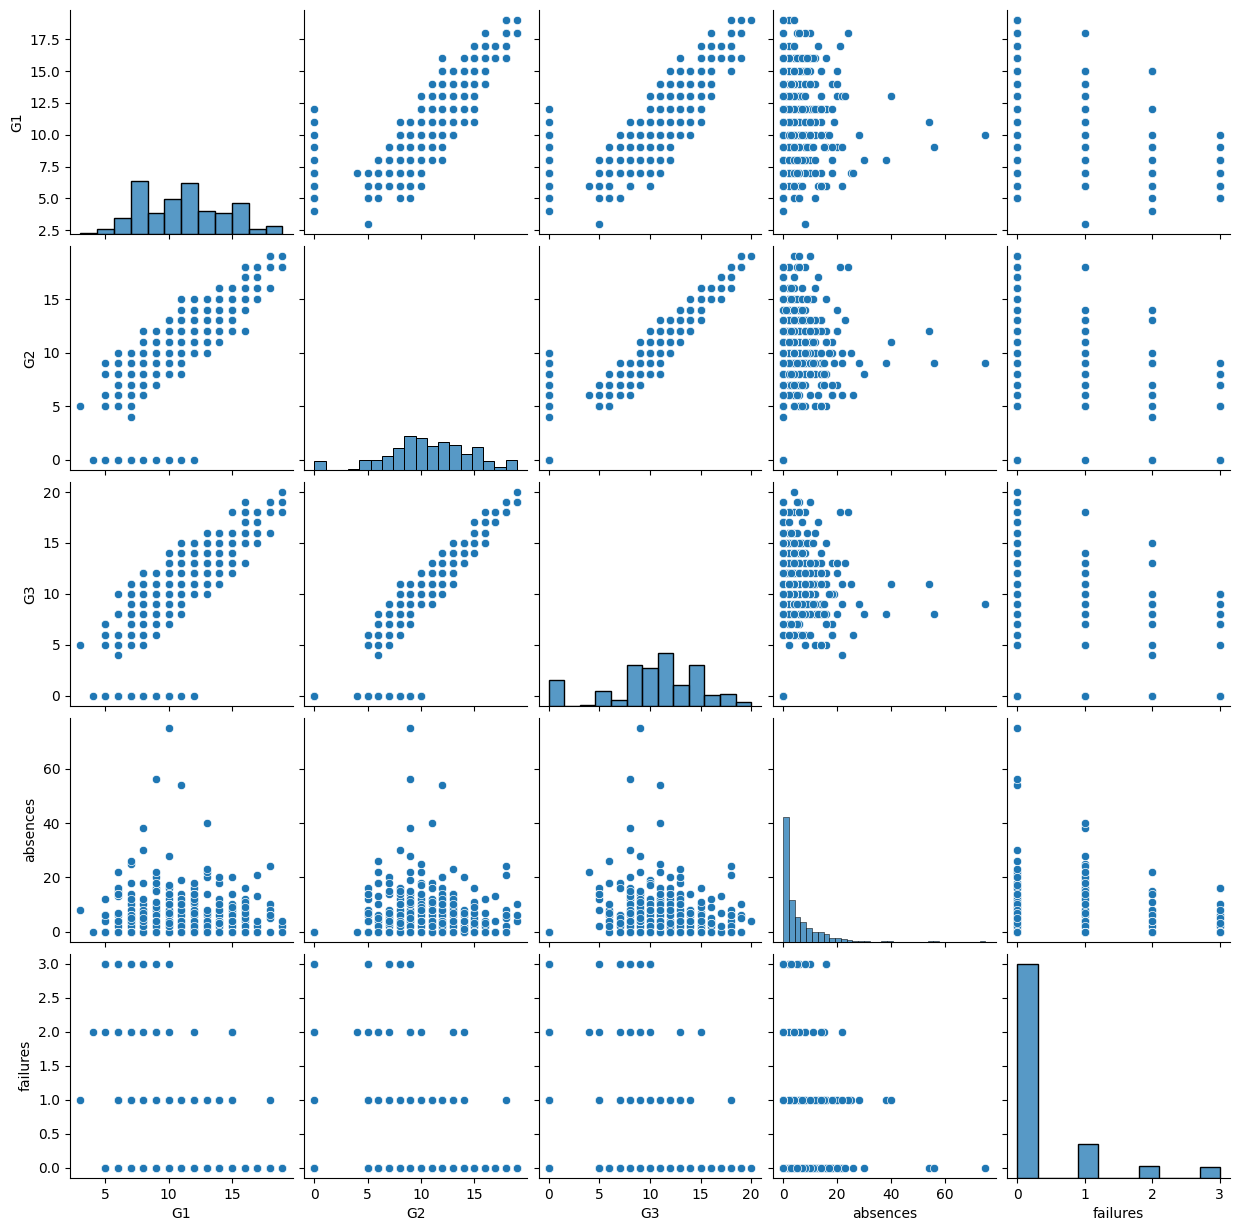

In [18]:
sns.pairplot(numeric_data[['G1', 'G2', 'G3', 'absences', 'failures']])


| Feature       | Proxy Column           | Reason                                                           |
| ------------- | ---------------------- | ---------------------------------------------------------------- |
| Sleep         | `freetime`             | More free time may mean better rest                              |
| Participation | `studytime` or `goout` | Active participation might relate to study or social interaction |
You can choose combinations like:

freetime + studytime

freetime + goout

studytime + failures

etc.

Letâ€™s try: freetime + studytime â†’ Predicting Final Grade G3

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Selecting the features
X = data[['freetime', 'studytime']]
y = data['G3']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Also try Linear Regression for comparison
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("ðŸ“ˆ Polynomial Regression:")
print(f"RÂ² Score: {r2_poly:.2f}")
print(f"MSE: {mse_poly:.2f}\n")

print("ðŸ“Š Linear Regression:")
print(f"RÂ² Score: {r2_linear:.2f}")
print(f"MSE: {mse_linear:.2f}")


ðŸ“ˆ Polynomial Regression:
RÂ² Score: -0.06
MSE: 21.70

ðŸ“Š Linear Regression:
RÂ² Score: -0.05
MSE: 21.47


**Interpretation**
If the RÂ² score of polynomial regression is higher and the MSE is lower than that of linear regression, then:
- Polynomial regression captured the non-linear relationship between studytime/freetime and G3 more effectively.
- If not, the linear model may be sufficient, or other features may need to be tested.

You can repeat this experiment using different feature combinations like:
- ['goout', 'failures']
- ['absences', 'studytime']
- ['health', 'Dalc']

